# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# OpenWeatherMap API Key
config = api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
units = "imperial"
#List of City data
lat=[]
lon=[]
temp=[]
humidity=[] 
cloudy=[]
windspeed=[]
count=0
cityname=[]
dt=[]


query_url = f"{url}&units={units}&q="
query_url + city
response = requests.get(query_url + city).json()
response


{'coord': {'lon': 80.55, 'lat': 73.51},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'model',
 'main': {'temp': 4.33,
  'pressure': 1026,
  'humidity': 94,
  'temp_min': 4.33,
  'temp_max': 4.33,
  'sea_level': 1026,
  'grnd_level': 1026},
 'wind': {'speed': 4.92, 'deg': 309},
 'clouds': {'all': 87},
 'dt': 1573518358,
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 25200,
 'id': 1507390,
 'name': 'Dikson',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
City = []
Country = []
Lat = []
Lng = []
Date = []
Humidity = []
Cloudiness = []
Max_Temp = []
Windspeed = []

index = 0

# Loop through the cities list using the api and append the selected info to the lists
for city in cities:
    print(f"Retrieving Results for Index {index}: {city}.")
    try:
        response = requests.get(query_url + city).json()
        
       
        # get info for each list created above and append to the list
        City.append(city)
        Country.append(response['sys']['country'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Date.append(response['dt'])
        Humidity.append(response["main"]['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Max_Temp.append(response['main']['temp_max'])
        Windspeed.append(response['wind']['speed'])
        
    except:
        print(f"     Missing field/result for {city}. Skipping.")
    
    index=index+1 
    time.sleep(7.8)

Retrieving Results for Index 0: bredasdorp.
Retrieving Results for Index 1: vao.
Retrieving Results for Index 2: upernavik.
Retrieving Results for Index 3: kuche.
     Missing field/result for kuche. Skipping.
Retrieving Results for Index 4: kondinskoye.
Retrieving Results for Index 5: olinda.
Retrieving Results for Index 6: tsihombe.
     Missing field/result for tsihombe. Skipping.
Retrieving Results for Index 7: matara.
Retrieving Results for Index 8: rikitea.
Retrieving Results for Index 9: torbay.
Retrieving Results for Index 10: cabo san lucas.
Retrieving Results for Index 11: chum phae.
Retrieving Results for Index 12: buin.
Retrieving Results for Index 13: bluff.
Retrieving Results for Index 14: stephenville.
Retrieving Results for Index 15: jamestown.
Retrieving Results for Index 16: labuhan.
Retrieving Results for Index 17: illoqqortoormiut.
     Missing field/result for illoqqortoormiut. Skipping.
Retrieving Results for Index 18: puerto ayora.
Retrieving Results for Index 19

Retrieving Results for Index 169: dunedin.
Retrieving Results for Index 170: tiksi.
Retrieving Results for Index 171: the pas.
Retrieving Results for Index 172: awbari.
Retrieving Results for Index 173: moree.
Retrieving Results for Index 174: bethel.
Retrieving Results for Index 175: malakal.
     Missing field/result for malakal. Skipping.
Retrieving Results for Index 176: longyearbyen.
Retrieving Results for Index 177: boissevain.
Retrieving Results for Index 178: merauke.
Retrieving Results for Index 179: attawapiskat.
     Missing field/result for attawapiskat. Skipping.
Retrieving Results for Index 180: harper.
Retrieving Results for Index 181: provideniya.
Retrieving Results for Index 182: praia da vitoria.
Retrieving Results for Index 183: sao joao da barra.
Retrieving Results for Index 184: katsuura.
Retrieving Results for Index 185: santa catalina.
Retrieving Results for Index 186: mogok.
Retrieving Results for Index 187: acari.
Retrieving Results for Index 188: tougan.
Retri

Retrieving Results for Index 334: berbera.
     Missing field/result for berbera. Skipping.
Retrieving Results for Index 335: kieta.
Retrieving Results for Index 336: savalia.
Retrieving Results for Index 337: marsala.
Retrieving Results for Index 338: ippy.
Retrieving Results for Index 339: sola.
Retrieving Results for Index 340: port lincoln.
Retrieving Results for Index 341: port hardy.
Retrieving Results for Index 342: galgani.
     Missing field/result for galgani. Skipping.
Retrieving Results for Index 343: egvekinot.
Retrieving Results for Index 344: fulitun.
     Missing field/result for fulitun. Skipping.
Retrieving Results for Index 345: hamilton.
Retrieving Results for Index 346: ramgarh.
Retrieving Results for Index 347: pisco.
Retrieving Results for Index 348: odweyne.
     Missing field/result for odweyne. Skipping.
Retrieving Results for Index 349: itupiranga.
Retrieving Results for Index 350: abu samrah.
Retrieving Results for Index 351: wernau.
Retrieving Results for I

Retrieving Results for Index 497: dingle.
Retrieving Results for Index 498: husavik.
Retrieving Results for Index 499: leeton.
Retrieving Results for Index 500: veraval.
Retrieving Results for Index 501: yarim.
Retrieving Results for Index 502: juneau.
Retrieving Results for Index 503: caravelas.
Retrieving Results for Index 504: baruun-urt.
Retrieving Results for Index 505: san carlos de bariloche.
Retrieving Results for Index 506: bandarbeyla.
Retrieving Results for Index 507: marzuq.
Retrieving Results for Index 508: xixiang.
Retrieving Results for Index 509: naze.
Retrieving Results for Index 510: diego de almagro.
Retrieving Results for Index 511: unai.
Retrieving Results for Index 512: vostok.
Retrieving Results for Index 513: yanchukan.
     Missing field/result for yanchukan. Skipping.
Retrieving Results for Index 514: lolua.
     Missing field/result for lolua. Skipping.
Retrieving Results for Index 515: rawannawi.
     Missing field/result for rawannawi. Skipping.
Retrieving 

In [15]:
weather_data = {"city":City,"latitude":Lat,"longitude":Lng,"date":Date,"temperature": Max_Temp,"humidity":Humidity,"cloudiness":Cloudiness,"windspeed":Windspeed}
weather_data = pd.DataFrame(weather_data)
weather_data

ValueError: arrays must all be same length

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

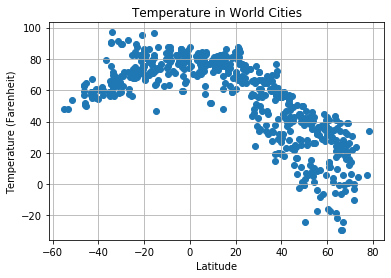

In [11]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

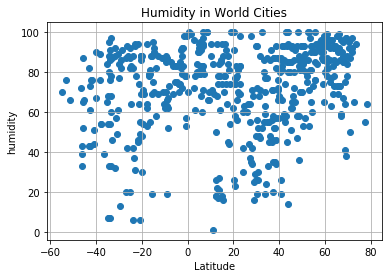

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

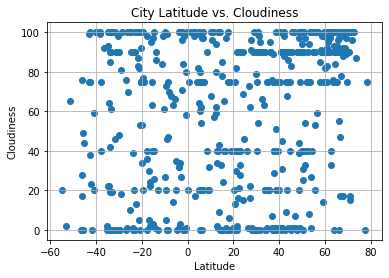

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

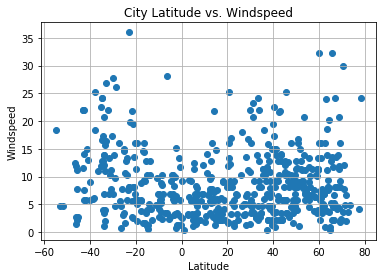

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedInWorldCities.png")

# Show plot
plt.show()